# Практика

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [49]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
crystalball_rv = sts.crystalball(1,100)
sample = crystalball_rv.rvs(100)
sample

array([ 1.063759  ,  0.34917412, -0.70062832, -0.35108031,  0.88027229,
        0.77052476,  0.64426509, -0.40556848,  1.2729259 ,  1.10737896,
        0.72039558, -0.31655541, -0.62490565, -0.77848377, -1.42051689,
       -0.30243992, -0.66114057,  1.78122369, -0.52030275, -0.45739385,
        0.78732139,  0.48399765,  1.20769129, -2.86001701, -0.28294461,
       -0.01770253,  1.95238615,  0.0147201 , -0.08661833,  1.57001164,
        0.53597049, -0.20125545,  0.17213094,  1.02725338, -0.59265365,
        0.31483965, -2.51111055, -0.20536658,  1.12360155,  0.87661501,
       -0.45822116,  0.92652268,  0.66164169, -0.15144164, -0.26651328,
       -2.37026162,  0.49876478, -1.05945377, -0.64658261, -0.59584254,
        1.63241372, -2.22904671, -0.19160993, -0.0248616 , -0.70598306,
        0.27047986,  1.83208614, -0.19094609, -0.14173841,  0.13111442,
       -0.05304064, -0.55400142,  0.0861206 , -0.11950056, -4.47407923,
        1.3454239 , -0.68184802,  0.25019253, -0.82613228, -0.78

In [50]:
sample.dtype

dtype('float64')

In [51]:
real_mean = crystalball_rv.mean() # настоящее среднее случайной величины
real_mean

-0.23195473117673196

In [52]:
real_var = crystalball_rv.var() # настоящая дисперсия случайной величины
real_var

1.6563615499711664

### Постройте гистограмму выборки и теоретическую плотность распределения

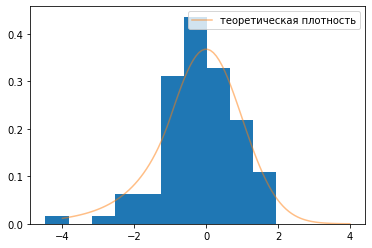

In [53]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = crystalball_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [54]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.14102836501865557
1.1029043810936652


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

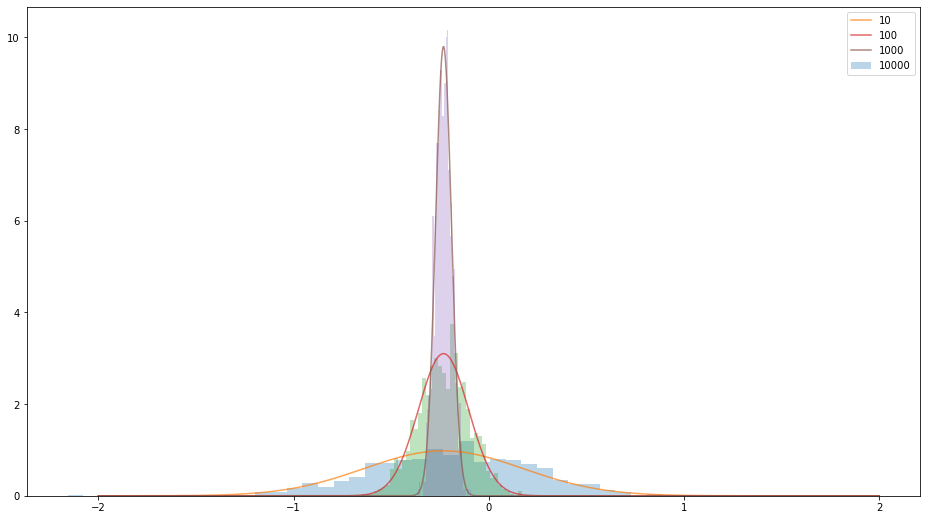

In [55]:
# ваш код тут
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10,100, 1000]:
    means = []
    for i in range(1000):
         means.append(np.mean(crystalball_rv.rvs(N)))
    plt.hist(means ,density=True, bins=40, alpha=0.3)
        
    mean = np.array(means)
    norm_rv = sts.norm(loc = crystalball_rv.mean(), scale = crystalball_rv.std() / np.sqrt(N))
    x = np.linspace(-2,2, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.7)
    

plt.legend(['10' ,'100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [56]:
print('Я считаю, что для выбранного распределения аппроксимация распределения выборочного среднего работает хорошо, т.к. полученные гистограммы похожи на нормальное распределение')

Я считаю, что для выбранного распределения аппроксимация распределения выборочного среднего работает хорошо, т.к. полученные гистограммы похожи на нормальное распределение


## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [57]:
url = 'https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
df = pd.read_csv(url)[['total day calls','churn']]

cnt_true = df.query('churn == True')['total day calls'].count()
std_true = df.query('churn == True')['total day calls'].std(ddof = 1)
mu_true = df.query('churn == True')['total day calls'].mean()
min_true = mu_true - (1.96 * std_true / np.sqrt(cnt_true))
max_true = mu_true + (1.96 * std_true / np.sqrt(cnt_true))
print('Доверительный интервал ' + str(min_true) + ' < X < ' + str(max_true))

Доверительный интервал 99.41062692289533 < X < 103.26018053052083


In [58]:
from statsmodels.stats.weightstats import _zconfint_generic

_zconfint_generic(mean = mu_true, alpha = 0.95, std_mean = std_true, alternative = 'two-sided')

(99.98204678079553, 102.68876067262063)

In [62]:
cnt_false = df.query('churn == False')['total day calls'].count()
std_false = df.query('churn == False')['total day calls'].std(ddof = 1)
mu_false = df.query('churn == False')['total day calls'].mean()
min_false = mu_false - (1.96 * std_false / np.sqrt(cnt_false))
max_false = mu_false + (1.96 * std_false / np.sqrt(cnt_false))
print('Доверительный интервал ' + str(min_false) + ' < X < ' + str(max_false))

Доверительный интервал 99.55617497470149 < X < 101.0101408147722


In [63]:
from statsmodels.stats.weightstats import _zconfint_generic

_zconfint_generic(mean = mu_false, alpha = 0.95, std_mean = std_false, alternative = 'two-sided')

(99.04149114274125, 101.52482464673244)